# 1) Load the dataset(Titanic.csv) into a pandas dataframe and print the first 5 rows using the head() method.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\User\Documents\Titanic.csv")

Matplotlib is building the font cache; this may take a moment.


In [13]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2) Use the info() method to get information about the dataset. In particular, pay attentionto the data types of each column and whether there are any missing values.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3) Use the describe() method to describe the dataset. Pay attention to the range of values for each numeric column and whether there are any outliers.

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4) Use the groupby() method to group the data based on the Pclass column and calculate the mean fare for each class.

In [16]:
mean_fare = df.groupby('Pclass')['Fare'].mean()
print (mean_fare)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


# 5) Use the value_counts() method to get the frequency count of the Embarked column.

In [17]:
Embarked_counts = df['Embarked'].value_counts()
print (Embarked_counts)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


# 6) Create a new column in the dataframe called AgeRange that categorises passengers into age ranges: "Child" for ages 0-12, "Teen" for ages 13-19, "Adult" for ages 20-59, and "Senior" for ages 60 and above.

In [18]:
def categorize_age (Age):
    if Age <= 12:
        return "child"
    elif Age <= 19:
        return "teen"
    elif Age <= 59:
        return "adult"
    else:
        return "senior"
    
df['Age_range'] = df['Age'].apply(categorize_age)

print (df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

# 7) Use the pivot_table() method to create a pivot table that shows the survival rate of passengers based on their sex, class, and age range.

In [19]:
pivot_table = pd.pivot_table(df, values='Survived', index=['Sex', 'Pclass'], columns='Age_range', aggfunc='mean')

print(pivot_table)

Age_range         adult     child    senior      teen
Sex    Pclass                                        
female 1       0.970588  0.000000  1.000000  1.000000
       2       0.896552  1.000000  1.000000  1.000000
       3       0.392857  0.478261  0.604651  0.590909
male   1       0.425000  1.000000  0.200000  0.250000
       2       0.052632  1.000000  0.230769  0.100000
       3       0.139785  0.360000  0.091837  0.078947


# 8) Create a bar chart that shows the total number of passengers in each age range.

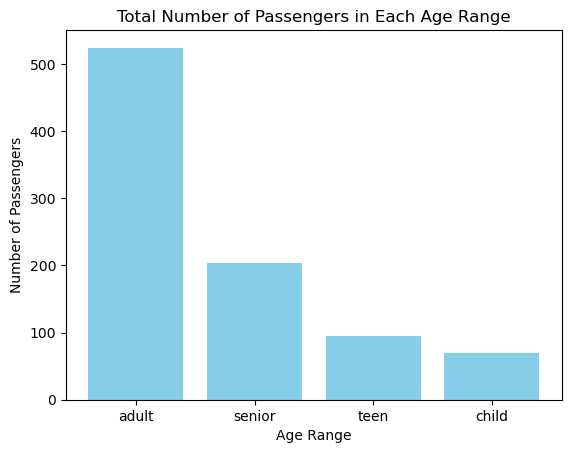

In [22]:
age_range_counts = df['Age_range'].value_counts()

# Plotting the bar chart
plt.bar(age_range_counts.index, age_range_counts.values, color='skyblue')
plt.xlabel('Age Range')
plt.ylabel('Number of Passengers')
plt.title('Total Number of Passengers in Each Age Range')
plt.show()

# 9) Use the pivot_table() method to create a pivot table that shows the survival rate of passengers based on their sex, class, and age range.

In [24]:
pivot_table = pd.pivot_table(df, values='Survived', index=['Sex', 'Pclass'], columns='Age_range', aggfunc='mean')

print(pivot_table)

Age_range         adult     child    senior      teen
Sex    Pclass                                        
female 1       0.970588  0.000000  1.000000  1.000000
       2       0.896552  1.000000  1.000000  1.000000
       3       0.392857  0.478261  0.604651  0.590909
male   1       0.425000  1.000000  0.200000  0.250000
       2       0.052632  1.000000  0.230769  0.100000
       3       0.139785  0.360000  0.091837  0.078947


# 10) Create a bar chart that shows the total number of passengers in each age range.

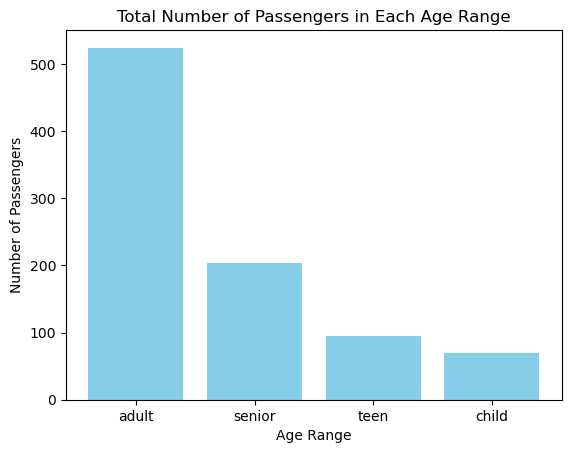

In [26]:
age_range_counts = df['Age_range'].value_counts()

plt.bar(age_range_counts.index, age_range_counts.values, color='skyblue')
plt.xlabel('Age Range')
plt.ylabel('Number of Passengers')
plt.title('Total Number of Passengers in Each Age Range')
plt.show()

# 11) Create a scatter plot that shows the relationship between age and fare. Color the points based on whether the passenger survived or not.